In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import math

In [2]:
building = pd.read_csv('files/building_metadata.csv')

In [3]:
missing_val_count_by_column = (building.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

year_built      774
floor_count    1094
dtype: int64


In [4]:
display(building.describe())

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


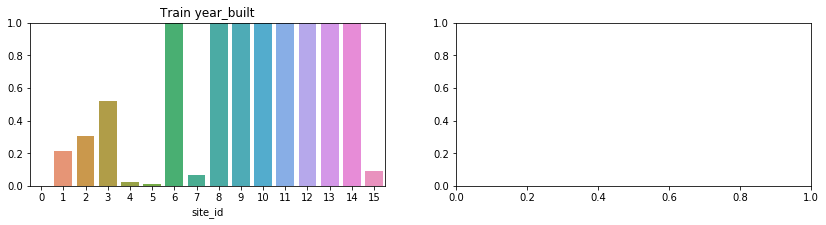

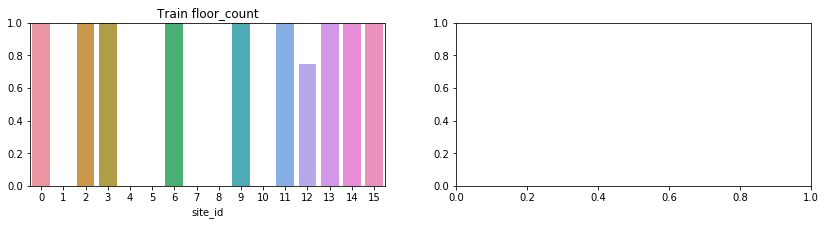

In [5]:
labels = ['year_built','floor_count']
for label in labels:
    missing_train = []
    x = list(range(0,16,1))
    for site_id in range(16):
        building_site = building[building['site_id']==site_id]
        missing_train.append( building_site[label].isnull().sum()/len(building_site) )
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))
    
    sns.barplot(x=x, y=missing_train,ax=ax1)
    ax1.set(xlabel='site_id', title='Train {}'.format(label), ylim=(0,1))
    plt.show()

In [6]:
building['has_year'] = ~building['year_built'].isnull()
building['has_floorcnt'] = ~building['floor_count'].isnull()

In [7]:
display(building)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,has_year,has_floorcnt
0,0,0,Education,7432,2008.0,NaN,True,False
1,0,1,Education,2720,2004.0,NaN,True,False
2,0,2,Education,5376,1991.0,NaN,True,False
3,0,3,Education,23685,2002.0,NaN,True,False
4,0,4,Education,116607,1975.0,NaN,True,False
...,...,...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN,True,False
1445,15,1445,Education,4298,NaN,NaN,False,False
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN,True,False
1447,15,1447,Lodging/residential,29775,2001.0,NaN,True,False


In [8]:
yr_stat = building.groupby('primary_use')['year_built'].mean()
year_built_mean = building['year_built'].mean()

In [9]:
for index, row in building.iterrows():
    if row['has_year'] is False:
        use = row['primary_use']
        building.loc[index,'year_built'] = yr_stat[use]
        if(math.isnan(building.loc[index,'year_built'])):
            building.loc[index,'year_built'] = year_built_mean

In [10]:
building['avg_floorsize'] = building['square_feet'] / building['floor_count']

In [11]:
avg_floor_stat = building.groupby('primary_use')['avg_floorsize'].describe()
display(avg_floor_stat)

,count,mean,std,min,25%,50%,75%,max
primary_use,,,,,,,,
Education,172.0,22930.085118,23418.106143,1000.000000,9688.446429,15223.026316,28244.750000,173479.0
Entertainment/public assembly,56.0,33333.725000,118324.994473,356.000000,3585.125000,7755.250000,18293.375000,875000.0
Food sales and service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Healthcare,1.0,18471.000000,NaN,18471.000000,18471.000000,18471.000000,18471.000000,18471.0
Lodging/residential,18.0,15885.040730,19341.224020,2529.666667,6368.883333,9955.750000,17647.325000,88480.0
Manufacturing/industrial,3.0,17455.333333,24158.643755,3164.500000,3508.750000,3853.000000,24600.750000,45348.5
Office,40.0,19561.394854,28880.609233,2325.000000,5799.250000,10786.062500,22036.500000,175618.0
Other,13.0,18601.192308,27799.292903,1566.000000,4482.000000,9357.000000,14346.500000,102994.0
Parking,3.0,36961.500000,32233.863688,387.000000,24828.250000,49269.500000,55248.750000,61228.0


In [12]:
avg_floor_m = (avg_floor_stat['25%'] + avg_floor_stat['75%'])/2

In [13]:
avg_floor_all = building['avg_floorsize'].describe()
avg_floor_all =  (avg_floor_all['25%'] + avg_floor_all['75%'])/2

In [14]:
print(avg_floor_m)
print(avg_floor_all)

primary_use
Education                        18966.598214
Entertainment/public assembly    10939.250000
Food sales and service                    NaN
Healthcare                       18471.000000
Lodging/residential              12008.104167
Manufacturing/industrial         14054.750000
Office                           13917.875000
Other                             9414.250000
Parking                          40038.500000
Public services                  13028.083333
Religious worship                         NaN
Retail                           13279.750000
Services                                  NaN
Technology/science               11948.962500
Utility                          11716.000000
Warehouse/storage                15499.500000
dtype: float64
15406.75138888889


In [15]:
for index, row in building.iterrows():
    if row['has_floorcnt'] is False:
        use = row['primary_use']
        building.loc[index,'floor_count'] = row['square_feet']/avg_floor_m[use]
        if(math.isnan(building.loc[index,'floor_count'])):
            building.loc[index,'floor_count'] = row['square_feet']/avg_floor_all

In [16]:
display(building)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,has_year,has_floorcnt,avg_floorsize
0,0,0,Education,7432,2008.000000,0.391847,True,False,NaN
1,0,1,Education,2720,2004.000000,0.143410,True,False,NaN
2,0,2,Education,5376,1991.000000,0.283446,True,False,NaN
3,0,3,Education,23685,2002.000000,1.248774,True,False,NaN
4,0,4,Education,116607,1975.000000,6.148019,True,False,NaN
...,...,...,...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.000000,1.793450,True,False,NaN
1445,15,1445,Education,4298,1962.579755,0.226609,False,False,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.000000,1.029778,True,False,NaN
1447,15,1447,Lodging/residential,29775,2001.000000,2.479575,True,False,NaN


In [17]:
building['floor_count'] = round(building['floor_count'])

In [18]:
building.describe()

,site_id,building_id,square_feet,year_built,floor_count,avg_floorsize
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,355.000000
mean,6.952381,724.000000,92111.776398,1968.675118,5.783299,22778.805388
std,5.003432,418.434583,110769.950997,21.908818,7.074874,51395.993145
min,0.000000,0.000000,283.000000,1900.000000,0.000000,356.000000
25%,3.000000,362.000000,23012.000000,1962.579755,2.000000,6623.100000
50%,5.000000,724.000000,57673.000000,1970.904110,4.000000,12259.000000
75%,13.000000,1086.000000,115676.000000,1975.000000,7.000000,24190.402778
max,15.000000,1448.000000,875000.000000,2017.000000,74.000000,875000.000000


In [19]:
building['age'] = 2017 - building['year_built']
building['age'] = round(building['age'])

In [20]:
display(building['age'].describe())

count    1449.000000
mean       48.280883
std        21.895197
min         0.000000
25%        42.000000
50%        46.000000
75%        54.000000
max       117.000000
Name: age, dtype: float64

In [21]:
building.drop(['year_built','avg_floorsize','has_year','has_floorcnt'],axis=1,inplace=True)

In [22]:
building.to_csv('files/building_metadata2.csv', index=False)

In [23]:
display(building)

,site_id,building_id,primary_use,square_feet,floor_count,age
0,0,0,Education,7432,0.0,9.0
1,0,1,Education,2720,0.0,13.0
2,0,2,Education,5376,0.0,26.0
3,0,3,Education,23685,1.0,15.0
4,0,4,Education,116607,6.0,42.0
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,2.0,103.0
1445,15,1445,Education,4298,0.0,54.0
1446,15,1446,Entertainment/public assembly,11265,1.0,20.0
1447,15,1447,Lodging/residential,29775,2.0,16.0
